# Нечеткие числа, множества и сети

<p align="right"> <i> Примерно половина </i> </p>

## Введение

До сих пор мы работали с наборами *чисел*, складывали их, умножали, проводили другие операции, чтобы достичь результата. Если мы захотели бы сделать нейронную сеть, которая принимала бы решение, идти ли нам сегодня гулять, то она работала бы примерно так (пусть будет только один нейрон): возьмем температуру на улице, умножим ее на 0.04 прибавим к этому переменную, показывающую, сколько друзей идут гулять, умноженную на 0.25, вычтем из этого переменную, показывающую, сколько домашних заданий нам задали, умноженную на 1.72, потом все это преобразуем сигмоидальной функцией и сравним с выбранным порогом. Если больше 0.5 пойдем гулять, если меньше - не пойдем. Вы правда **так** размышляете?

Конечно нет, люди думают по-другому:  *если на улице тепло, почти все друзья гуляют и домашек задали не много - тогда я иду гулять.*

Но что такое здесь "тепло" - это сколько градусов 10, 20? Что такое "почти все" - 80%, 90%, 99%? Что такое "не много" - одна, две, десять домашек?

Эти понятия *неопределены* четко и ясно, но вы прекрасно их понимаете. А компьютер - нет. Ему подавай четко определенные числа. Хотелось бы, чтобы и компьютер понимал такие неопределенные, **нечеткие** понятия, как близко\далеко, много\мало, тепло\холодно и др.

И такой способ придумали! Назвали этот способ **нечеткой логикой**, которая работает с **нечеткими множествами** (нечеткими числами, понятиями). По-английски - [**fuzzy logic**](https://ru.wikipedia.org/wiki/Нечёткая_логика). Термин введен ученым [Лотфи Заде](https://ru.wikipedia.org/wiki/Заде,_Лотфи)

Давайте на примере температуры посмотрим, как можно компьютеру указать, что такое "тепло".

"Тепло" - это нечеткое понятие, множество, а температура измеряется в четких числах - градусах (Цельсия).

Давайте сделаем сопоставление температуры в градусах и понятия "тепло", т.е. введем некоторую функцию, которая для каждой возможной температуры показывала бы она относится к понятию "тепло" или не относится и насколько сильно относится. Такую функцию назвали *функция принадлежности* и принято задавать ее от 0 до 1, 0 - число не относится к нечеткому понятию, 1 - число абсолютно полно относится к нечеткому понятию, а промежуточные величины показывают степень нашей уверенности в том, что конкретное число относится к заданному нечеткому понятию.

Для нечеткого множества "тепло" можем сказать, например, так:
* 25 градусов - это точно тепло, принадлежность равна 1.
* 20 градусов - тоже тепло, но не совсем, принадлежность равна 0.9.
* 15 градусов - может тепло, а может не тепло, принадлежность равна 0.5
* 10 градусов - точно не тепло, принадлежность равна 0
* и так для любой температуры

Можем построить график:

Text(0, 0.5, 'Принадлежность')

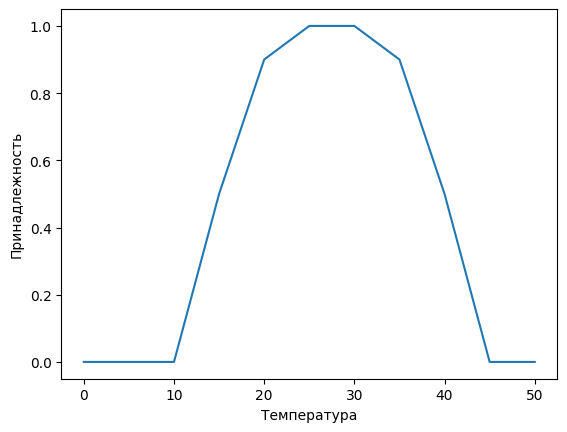

In [1]:
from matplotlib import pyplot as plt
plt.plot([0,5,10,15,20,25, 30, 35, 40,45, 50],[0,0,0, 0.5, 0.9, 1, 1, 0.9, 0.5, 0, 0])
plt.xlabel('Температура')
plt.ylabel('Принадлежность')

Мы сказали компьютеру, как понимать нечеткое понятие "тепло". Конечно, это наш выбор и наша задача, задать функцию принадлежности. Мы могли бы задать и другую функцию принадлежности для этих же чисел.

Итак, нечетким множеством является
* а) набор элементов (чисел), которые входят в это множество
* б) значения функции принадлежности для этих элементов (чисел).

*Функция принадлежности - функция от 0 до 1, которая показывает степень нашей уверенности в том, что заданное число принадлежит к заданному нечеткому множеству.*

<details>
    <summary> <b>Функция принадлежности VS вероятность: (нажмите, необязательно)</b> </summary>
Пожалуйста, не путайте нечеткие вычисления с вероятностными, хоть они по форме очень похожи. Вероятность - это объективная, вычисляемая величина, тогда как функция принадлежности - задается пользователем произвольно.
</details>

# Нечеткая логика
Введя нечеткие множества, надо ввести операции с ними.

## Операции с четкими множествами
Для обычных, четких множеств, мы знаем три базовые операции:
* **дополнение** множества - все элементы, которые не входят в это множество (линия 4 на рис.)
* **пересечение** двух множеств - элементы, которые входят одновременно и в первое и во второе множества (линия 1 на рис.)
* **объединение** - элементы, которые входят хотя бы в одно из множеств (линия 2 на рис.)

На основе этих операций можно делать другие логические операции с множествами, например:
* **разность** двух множеств это пересечение первого множества с дополнением второго (линия 3 на рис.).


![img](https://drive.google.com/uc?id=1p-UIRkjP3PaNq3JtnRhcHKX2jU3HB_oo)

Для бинарных множеств, объединение это операция **ИЛИ**, пересечение - это операция **И**, а дополнение - операция **НЕ**.

## Операции с нечеткими множествами
Для нечетких множеств, чтобы можно было строить вычисления с ними, нужно ввести такие же операции.

В нечетких множествах кроме наборов элементов, заданы также и функции принадлежности, значит нечеткие логические операции должны обрабатывать функции принадлежности. Операции с элементами такие же, как и в четких множествах, но поскольку функции принадлежности заданы на всех элементах (всегда можно приписать принадлежность 0 тем элементам, которые не входят в множество), то обрабатывать сами элементы множеств смысла нет и мы будем работать только с функциями принадлежности нечетких множеств. Есть несколько вариантов, как именно обрабатывать функции принадлежности в нечеткой логике, мы воспользуемся способом, предложенным Лотфи Заде:

Пусть
- Ma(x) - функция принадлежности элементов x к нечеткому множеству A
- Mb(x) - функция принадлежности элементов x к нечеткому множеству B

тогда:

* дополнение множества A : A' - имеет функцию принадлежности равную 1-Ma(x)
* пересечение множеств A и B - имеет функцию принадлежности MIN(Ma(x),Mb(x)), т.е. выбирает **минимальное** значение принадлежности
* объединение множеств A и B - имеет функцию принадлежности MAX(Ma(x),Mb(x)), т.е. выбирает **максимальное** значение принадлежности



### Пример
Задан нечеткий интервал "примерно от 5 до 8" и нечеткое число "около 4".
Их функции принадлежности показаны на рисунке и заданы на множестве элементов от 0 до 10 так:

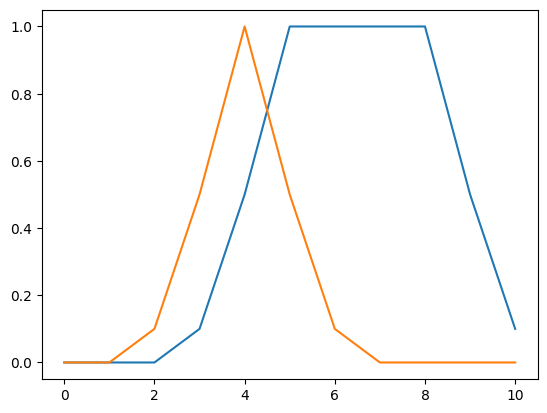

In [2]:
import numpy as np
Interval_5_8= np.array([0, 0, 0, 0.1, 0.5, 1, 1, 1, 1, 0.5, 0.1])
Digit_4     = np.array([0, 0, 0.1, 0.5, 1, 0.5, 0.1, 0, 0, 0, 0])
plt.plot(Interval_5_8);
plt.plot(Digit_4);

#### Задание
Найдите и постройте:
* дополнение для нечеткого числа "около 4"
* пересечение нечеткого интервала "примерно от 5 до 8"  и числа "около 4"
* объединение нечеткого интервала "примерно от 5 до 8"  и числа "около 4"
* разность нечеткого интервала "примерно от 5 до 8"  и числа "около 4"

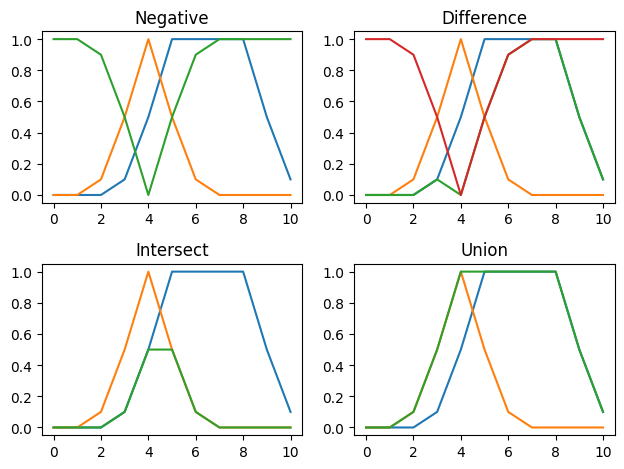

In [3]:
Digit_4_negative= 1 - Digit_4;# для дополнения: единица минус принадлежность
Intersect=np.minimum(Interval_5_8,Digit_4);# для пересечения - минимум
Union=np.maximum(Interval_5_8,Digit_4);# для объединения - максимум
Difference=np.minimum(Interval_5_8,Digit_4_negative);# для разности - пересечение с дополнением
#Negative
plt.subplot(221);
plt.plot(Interval_5_8);
plt.plot(Digit_4);
plt.plot(Digit_4_negative);
plt.title('Negative');
#Intersect
plt.subplot(223);
plt.plot(Interval_5_8);
plt.plot(Digit_4);
plt.plot(Intersect);
plt.title('Intersect');
#Union
plt.subplot(224);
plt.plot(Interval_5_8);
plt.plot(Digit_4);
plt.plot(Union);
plt.title('Union');
#Difference
plt.subplot(222);
plt.plot(Interval_5_8);
plt.plot(Digit_4);
plt.plot(Difference);
plt.plot(Digit_4_negative);
plt.title('Difference');
#
plt.tight_layout()
# результат - зеленая линия.

Используя такие логические операции можно решать задачи в нечетких числах.

Обычно решение строится с помощью нечетких правил ЕСЛИ...ТОГДА.

 Если "Тепло" И "Домашек мало" ТОГДА Иду гулять

Для этого надо:
* перевести переменные в нечеткий вид: выбрать нечеткие множества и задать функции принадлежности им - процесс *фаззификации*.
* придумать нечеткие логические правила ЕСЛИ...ТОГДА, которые используют нечеткие множества и логические операции с ними. Такие правила обычно вполне понятны и объяснимы для человека.
* Рассчитать правила.
* Если в результате получилось нечеткое множество (это не обязательно), то перевести его обратно в четкий вид - процесс *дефаззификации*.

## Пример нечеткого логического вывода. Библиотека `skfuzzy`

Для работы с нечеткими множествами и нечеткими правилами есть библиотека [`skfuzzy`](https://pythonhosted.org/scikit-fuzzy/). Ознакомьтесь с документацией и не забудьте установить библиотеку.

In [4]:
# Установку надо сделать только раз.
!pip install -U scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=c6c53973ffec8b397b20ef5eb64c0b134f137bfdf17fd778c408cf9facf7453f
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


Давайте реализуем пример, в котором посчитаем, сколько чаевых оставлять в ресторане, в зависимости от качества еды и качества обслуживания (конечно, это важно понимать для ресторанов, а не для посетителей, те и так знают).

Две входные переменные: качество обслуживания `service` и качество еды `quality`. Это не очень четко определенные понятия, сопоставим им нечеткие множества:
* Качество обслуживания `service`: элементы множеств: от 0 до 10, Множества: "плохое", "приемлемое", "замечательное" (poor, acceptable, amazing).
* Качество еды `quality`: элементы множеств: от 0 до 10, Множества: "отвратительное", "так_себе", "прекрасное" (bad, decent, great).

Выходная переменная `tip` - сколько чаевых оставить - тоже нечеткая: элементы множеств: от 0% до 25%, Множества: "немного", "средне", "много" (low, medium, high)

Надо составить правила, их может быть много, но мы ограничимся несколькими, примерно такого вида:
* ЕСЛИ  обслуживание было "плохое" ИЛИ еда была "отвратительна" ТОГДА чаевых "немного".
* ЕСЛИ  обслуживание было "так_себе" ТОГДА чаевых "средне".
* ЕСЛИ  обслуживание было "замечательное" ИЛИ еда была "прекрасное" ТОГДА чаевых "много".
* и т.п.

В результате обработки правил получим ответ в виде нечеткого множества. Функция принадлежности результата показывает насколько сильно правило выполняется. Выберем правило (результат), которое сильнее всех выполняется, переведем его в четкий вид и окончательно узнаем уже в процентах, сколько чаевых оставить.

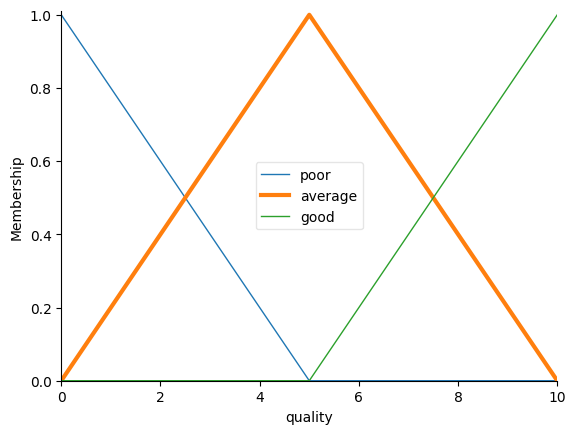

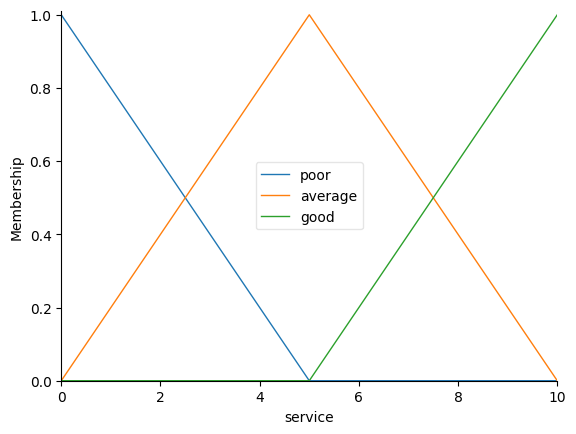

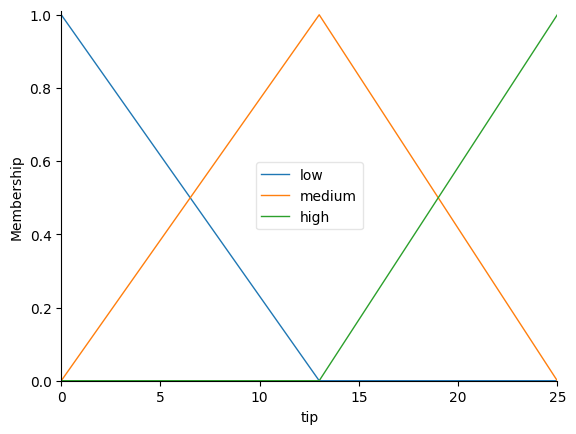

In [5]:
import numpy as np # подключаем numpy
import skfuzzy as fuzz # подключаем библиотеку skfuzzy
from skfuzzy import control as ctrl # и модуль control для задания переменных и правил

# Зададим элементы для переменных - нечетких множеств
quality = ctrl.Antecedent( # качество еды. Antecedent - значит входные переменные
    np.arange(0, 11, 1), # перечисляем элементы от 0 до 10
    'quality') # название переменной - качество еды
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service') # качество обслуживания

# выходная переменная - количество чаевых.
tip = ctrl.Consequent(# Consequent - значит результат, вывод, т.е. выходная переменная
    np.arange(0, 26, 1),# значения от 0 до 25 %
    'tip') # название

# Функции принадлежности можно задать автоматически (они будут треугольные),
# тогда библиотека сама подберет диапазоны, а мы укажем лишь количество нечетких множеств
quality.automf(3) # три нечетких множества для входной переменной
service.automf(3) # три нечетких множества для входной переменной
# Если задаем автоматически, то названия множеств потеряются,
# и будут использоваться автоматические названия "poor", "average", "good"

# Но можно и в ручную задавать функции принадлежности, давайте для выходной переменной зададим сами
# trimf задает треугольную функцию принадлежности, мы ей указываем
# tip.universe - перечисление всех элементов
# [0, 0, 13] - положения левого конца, вершины и правого конца треугольника
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13]) # низкие чаевые от 0 до 13 с максимумом в нуле
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25]) # средние чаевые от 0 до 25 с максимумом в 13
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25]) # высокие чаевые от 13 до 25 с макимумом в 25

# Метод .view() покажет функции принадлежности графически
quality['average'].view() # покажет все, но выделит множество 'average' (это, как мы помним, автоматическое название множества)
service.view() # покажет все
tip.view() # покажет все

In [6]:
# НЕЧЕТКИЕ ПРАВИЛА
""""
Зададим три правила, используя метод .Rule()
1. ЕСЛИ еда quality плохая poor ИЛИ обслуживание service плохое poor, ТОГДА чаевые tip низкие low
2. ЕСЛИ обслуживание service средненькое average, ТОГДА чаевые tip средние medium
3. ЕСЛИ еда quality хорошая good ИЛИ обслуживание service хорошее good, ТОГДА чаевые высокие high.
"""

rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low']) #
rule2 = ctrl.Rule(service['average'], tip['medium']) #
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high']) #

In [10]:
# задав все переменные и правила, соберем их в единую систему методом ControlSystem()
# это название не просто так - подобные системы применяются для управления.
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3]) #

# Созданная система управления абстрактна,
# давайте сделаем ее симулятор,
# который уже можно будет использовать для расчетов: ControlSystemSimulation()

tipping = ctrl.ControlSystemSimulation(tipping_ctrl) #

# Теперь можно просимулировать эту систему,
# зададим входы
tipping.input['quality'] = 6.5 # т.е. мы оценили качество еды на 6.5 из 10
tipping.input['service'] = 9.8 # т.е. мы оценили качество обслуживания на 9.8 из 10

# Рассчитаем систему правил с этими входами
tipping.compute() # обрабатываются все правила ....

#
print(tipping.output['tip']) # смотрим результат

# Итак, с такими оценками качества еды и обслуживания мы должны оставить 19.84% чаевых.
# Теперь ресторан будет примерно понимать, чего можно ожидать.

19.847607361963192


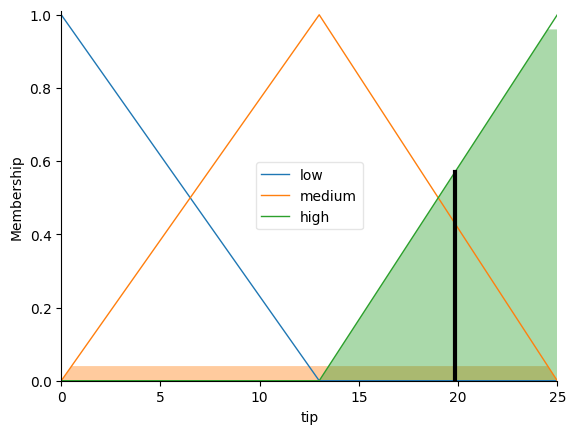

In [ ]:
tip.view(sim=tipping) # посмотрим на результат
# Для каждого возможного выходного нечеткого множества посчитано,
# насколько сильно оно выполняется (уровень закрашивания)
# а для максимально подходящего (high, зеленое)
# проведена дефазификация - выбрано такое число, которое лучше всех представляет это множество
# конкретно здесь - дефазификация по центроиду, так, чтобы элементы справа от числа уравновешивали элементы слева от него.

# Домашнее задание
Полезность такой системы  будет зависеть и от качества правил, насколько хорошо вы предусмотрели разные варианты, и от функций принадлежности, попробуйте, например, посчитать, сколько чаевых оставить, если еда - отличная, а обслуживание - ужасное.


In [ ]:
tipping.input['quality'] = 0.0 #
tipping.input['service'] = 0.0 #

# Рассчитаем систему правил с этими входами
tipping.compute()
print(tipping.output['tip'])

4.333333333333333


При ужасном обслуживании оставить 12% чаевых, да хоть сколько-нибудь, нет уж, спасибо. Так происходит потому, что мы не предусмотрели в правилах такой ситуации. И у нас всего-то 3 нечетких множества на каждую переменную, этого мало.

В качестве домашнего задания добавляйте новые правила, изменяйте количество нечетких множеств, и попробуйте сделать более реалистичную систему.


## Ссылки

Ссылки на литературу:

Jang, J.-S.R. (1993). "ANFIS: adaptive-network-based fuzzy inference system". IEEE Transactions on Systems, Man and Cybernetics. 23 (3): 665–685. doi:10.1109/21.256541.

Использованы и адаптированы материалы:

https://pythonhosted.org/scikit-fuzzy/

https://github.com/jfpower/anfis-pytorch


